In [1]:
import pandas as pd
from neuralprophet import NeuralProphet

In [2]:
data = pd.read_csv('example_air_passengers.csv',delimiter=';', skiprows=0,low_memory=False)
print(data.tail(44))

            ds  y
56  10/12/2020  5
57  11/12/2020  5
58  12/12/2020  0
59  13/12/2020  1
60  14/12/2020  0
61  15/12/2020  1
62  16/12/2020  1
63  17/12/2020  0
64  18/12/2020  0
65  19/12/2020  3
66  20/12/2020  2
67  21/12/2020  3
68  22/12/2020  1
69  23/12/2020  1
70  24/12/2020  1
71  25/12/2020  2
72  26/12/2020  0
73  27/12/2020  3
74  28/12/2020  2
75  29/12/2020  1
76  30/12/2020  0
77  31/12/2020  1
78  01/01/2021  1
79  02/01/2021  2
80  03/01/2021  1
81  04/01/2021  0
82  05/01/2021  1
83  06/01/2021  0
84  07/01/2021  0
85  08/01/2021  0
86  09/01/2021  2
87  10/01/2021  2
88  11/01/2021  1
89  12/01/2021  2
90  13/01/2021  1
91  14/01/2021  0
92  15/01/2021  0
93  16/01/2021  1
94  17/01/2021  0
95  18/01/2021  0
96  19/01/2021  1
97  20/01/2021  2
98  21/01/2021  1
99  22/01/2021  0


In [3]:
prcp_data = data.rename(columns={'ds': 'ds', 'y': 'y'})[['ds', 'y']]

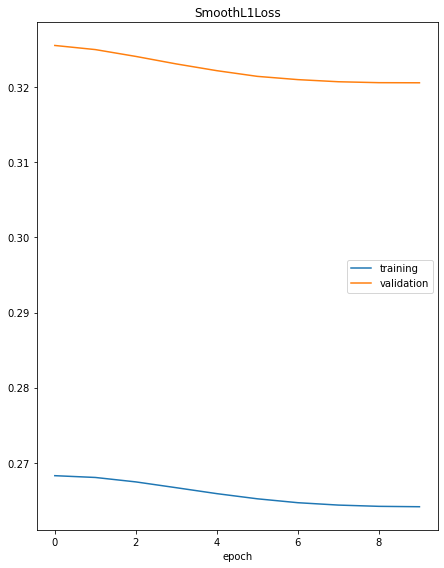

Epoch[10/10]: 100%|██████████| 10/10 [00:09<00:00,  1.06it/s, SmoothL1Loss=0.264, MAE=5.25, RegLoss=0, MAE_val=5.97, SmoothL1Loss_val=0.321]


In [4]:
model = NeuralProphet()
metrics = model.fit(prcp_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, epochs=10)

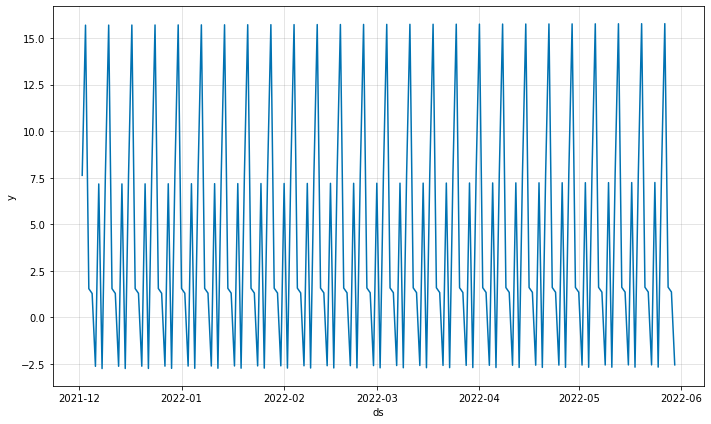

In [5]:
future = model.make_future_dataframe(prcp_data, periods=180)
forecast = model.predict(future)
forecasts_plot = model.plot(forecast)

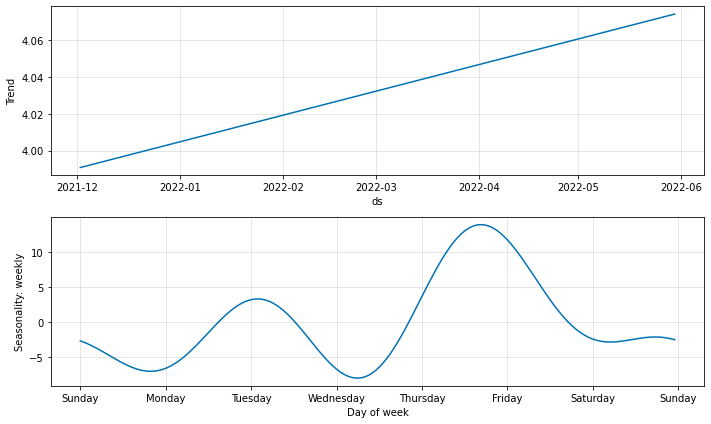

In [6]:
fig_comp = model.plot_components(forecast)

Text(0.5, 1.0, 'S&P 500 Prices')

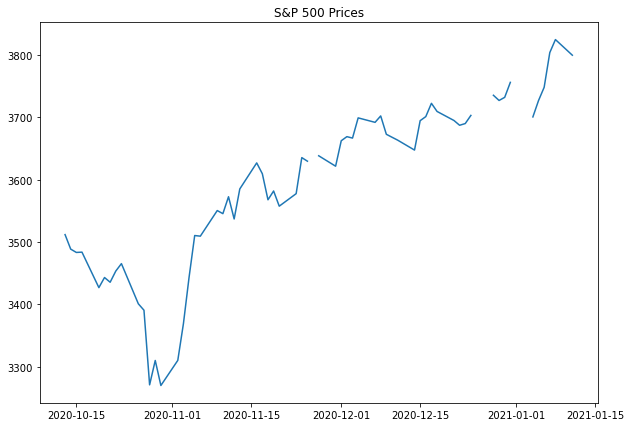

In [7]:
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
start = datetime(2020, 10, 13)
end = datetime(2021, 1, 11)
sp500_data = pdr.get_data_fred('sp500', start, end)
plt.figure(figsize=(10, 7))
plt.plot(sp500_data)
plt.title('S&P 500 Prices')

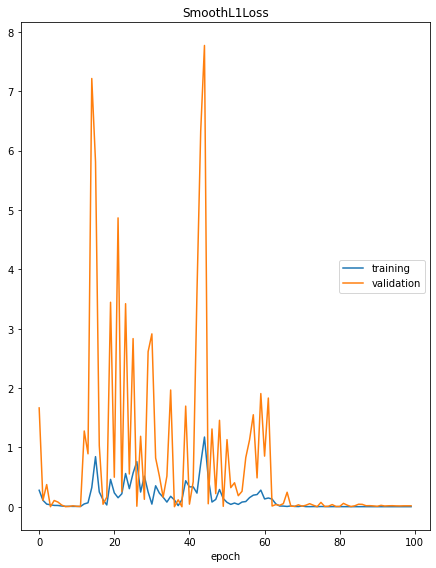

Epoch[100/100]: 100%|██████████| 100/100 [00:30<00:00,  3.25it/s, SmoothL1Loss=0.00219, MAE=26, RegLoss=0.00095, MAE_val=86.4, SmoothL1Loss_val=0.0167]


In [8]:
sp500_data = sp500_data.reset_index().rename(columns={'DATE': 'ds', 'sp500': 'y'}) # the usual preprocessing routine
model = NeuralProphet(n_changepoints=100,
                      trend_reg=0.05,
                      yearly_seasonality=False,
                      weekly_seasonality=False,
                      daily_seasonality=False)
metrics = model.fit(sp500_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, 
                    epochs=100)

In [9]:
def plot_forecast(model, data, periods, historic_pred=True, highlight_steps_ahead=None):
  
    """ plot_forecast function - generates and plots the forecasts for a NeuralProphet model
    - model -> a trained NeuralProphet model
    - data -> the dataframe used for training
    - periods -> the number of periods to forecast
    - historic_pred -> a flag indicating whether or not to plot the model's predictions on historic data
    - highlight_steps_ahead -> the number of steps ahead of the forecast line to highlight, used for autoregressive models only"""
    
    future = model.make_future_dataframe(data, 
                                         periods=periods, 
                                         n_historic_predictions=historic_pred)
    forecast = model.predict(future)
    
    if highlight_steps_ahead is not None:
        model = model.highlight_nth_step_ahead_of_each_forecast(highlight_steps_ahead)
        model.plot_last_forecast(forecast)
    else:    
        model.plot(forecast)

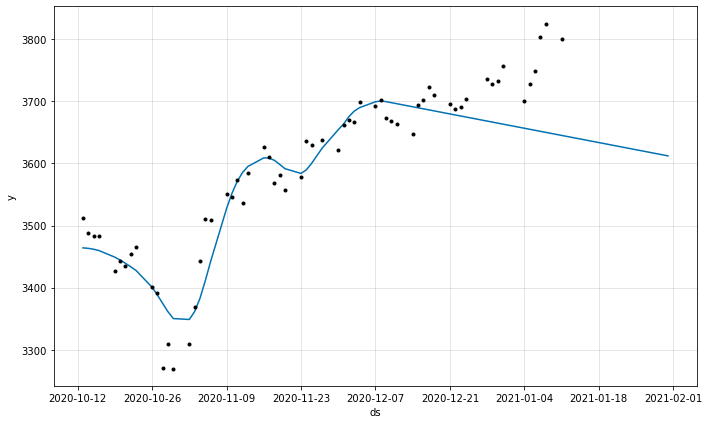

In [10]:
plot_forecast(model, sp500_data, periods=20)

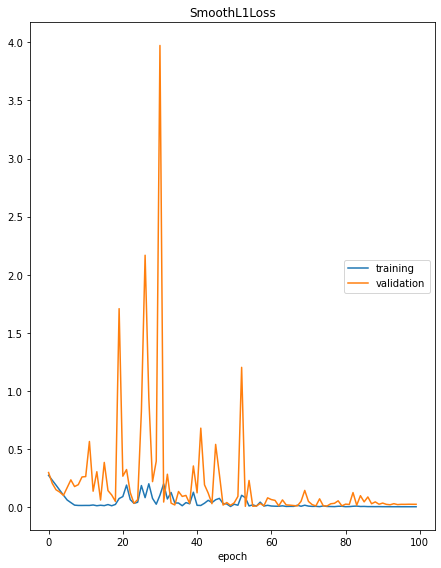

Epoch[100/100]: 100%|██████████| 100/100 [00:08<00:00, 12.04it/s, SmoothL1Loss=0.00461, MAE=26.7, RegLoss=0.00966, MAE_val=70, SmoothL1Loss_val=0.0256]


In [11]:
model = NeuralProphet(n_changepoints=100,
                      trend_reg=0.5,
                      yearly_seasonality=False,
                      weekly_seasonality=True,
                      daily_seasonality=False)
metrics = model.fit(sp500_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, 
                    epochs=100)

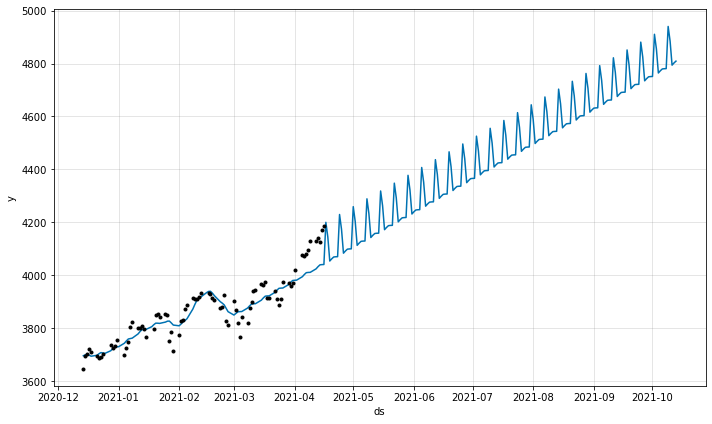

In [12]:
plot_forecast(model, sp500_data, periods=180)

In [13]:
model = NeuralProphet(
    n_forecasts=20,
    n_lags=20,
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    batch_size=64,
    epochs=100,
    learning_rate=1.0,
)
model.fit(sp500_data, 
          freq='D',
          valid_p=0.2,
          epochs=100)

INFO: nprophet - _handle_missing_data: 34 missing dates were added.
INFO: nprophet - _handle_missing_data: 39 NaN values in column y were auto-imputed.
Epoch[100/100]: 100%|██████████| 100/100 [00:00<00:00, 103.63it/s, SmoothL1Loss=0.00208, MAE=26.5, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.619791,529.927061,0.0
1,0.134980,217.790879,0.0
2,0.220477,300.509865,0.0
3,0.185780,268.272059,0.0
4,0.139248,223.827889,0.0
...,...,...,...
95,0.002073,26.539369,0.0
96,0.002081,26.534394,0.0
97,0.002084,26.521975,0.0
98,0.002083,26.508768,0.0


INFO: nprophet - _handle_missing_data: 34 missing dates were added.
INFO: nprophet - _handle_missing_data: 39 NaN values in column y were auto-imputed.


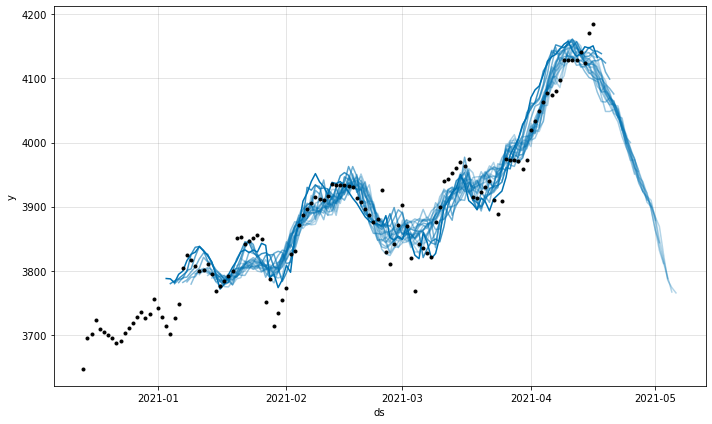

In [14]:
plot_forecast(model, sp500_data, periods=180)

In [15]:
data = pd.read_csv('example_retail_sales2.csv',delimiter=';', skiprows=0,low_memory=False)
print(data.tail(44))

          Date  Second_Wave_Cases
56  09/12/2020                291
57  10/12/2020                294
58  11/12/2020                255
59  12/12/2020                174
60  13/12/2020                231
61  14/12/2020                261
62  15/12/2020                261
63  16/12/2020                221
64  17/12/2020                339
65  18/12/2020                244
66  19/12/2020                204
67  20/12/2020                230
68  21/12/2020                298
69  22/12/2020                266
70  23/12/2020                244
71  24/12/2020                260
72  25/12/2020                172
73  26/12/2020                204
74  27/12/2020                204
75  28/12/2020                236
76  29/12/2020                205
77  30/12/2020                286
78  31/12/2020                285
79  01/01/2021                205
80  02/01/2021                269
81  03/01/2021                372
82  04/01/2021                312
83  05/01/2021                411
84  06/01/2021

In [16]:
prcp_data = data.rename(columns={'Date': 'ds', 'Second_Wave_Cases': 'y'})[['ds', 'y']]

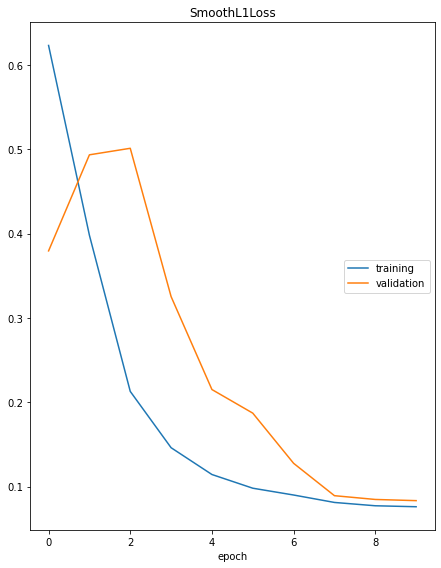

Epoch[10/10]: 100%|██████████| 10/10 [00:01<00:00,  5.32it/s, SmoothL1Loss=0.0762, MAE=261, RegLoss=0, MAE_val=261, SmoothL1Loss_val=0.0835]


In [17]:
model = NeuralProphet()
metrics = model.fit(prcp_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, epochs=10)

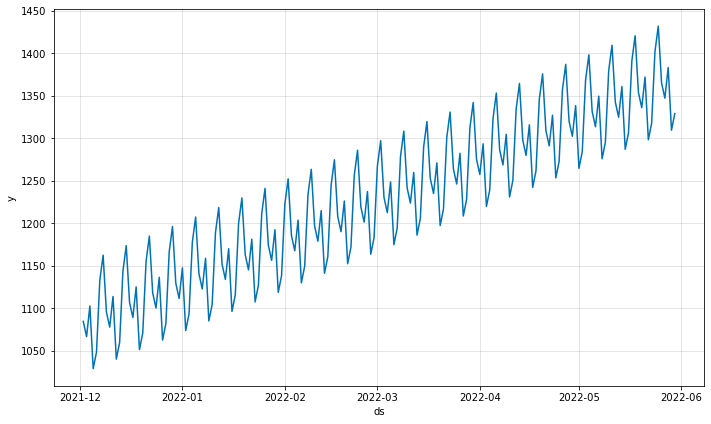

In [18]:
future = model.make_future_dataframe(prcp_data, periods=180)
forecast = model.predict(future)
forecasts_plot = model.plot(forecast)

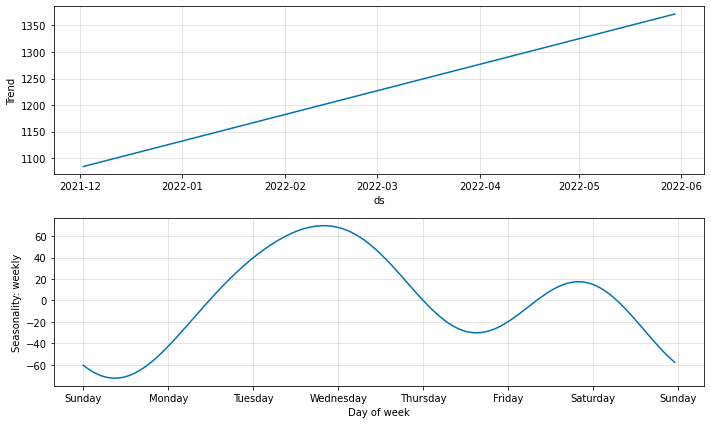

In [19]:
fig_comp = model.plot_components(forecast)

Text(0.5, 1.0, 'S&P 500 Prices')

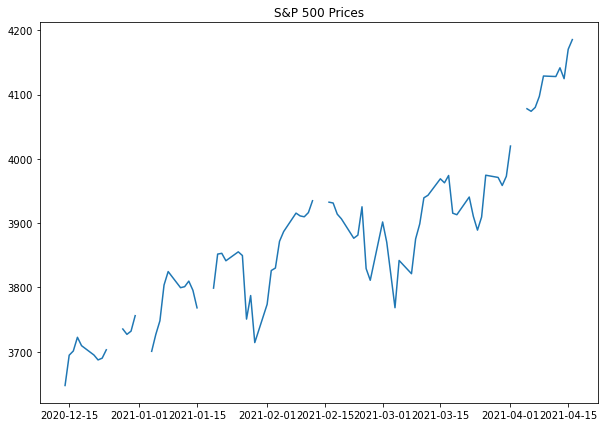

In [20]:
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
start = datetime(2020, 12, 13)
end = datetime(2021, 12, 11)
sp500_data = pdr.get_data_fred('sp500', start, end)
plt.figure(figsize=(10, 7))
plt.plot(sp500_data)
plt.title('S&P 500 Prices')

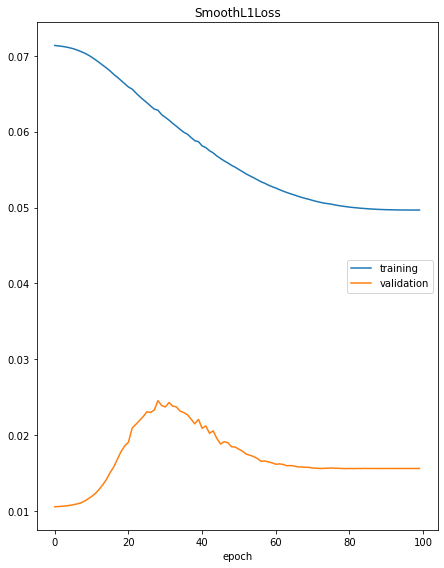

Epoch[100/100]: 100%|██████████| 100/100 [00:07<00:00, 13.09it/s, SmoothL1Loss=0.0497, MAE=101, RegLoss=0.000552, MAE_val=51.7, SmoothL1Loss_val=0.0156]


In [21]:
sp500_data = sp500_data.reset_index().rename(columns={'DATE': 'ds', 'sp500': 'y'}) # the usual preprocessing routine
model = NeuralProphet(n_changepoints=100,
                      trend_reg=0.05,
                      yearly_seasonality=False,
                      weekly_seasonality=False,
                      daily_seasonality=False)
metrics = model.fit(sp500_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, 
                    epochs=100)

In [22]:
def plot_forecast(model, data, periods, historic_pred=True, highlight_steps_ahead=None):
  
    """ plot_forecast function - generates and plots the forecasts for a NeuralProphet model
    - model -> a trained NeuralProphet model
    - data -> the dataframe used for training
    - periods -> the number of periods to forecast
    - historic_pred -> a flag indicating whether or not to plot the model's predictions on historic data
    - highlight_steps_ahead -> the number of steps ahead of the forecast line to highlight, used for autoregressive models only"""
    
    future = model.make_future_dataframe(data, 
                                         periods=periods, 
                                         n_historic_predictions=historic_pred)
    forecast = model.predict(future)
    
    if highlight_steps_ahead is not None:
        model = model.highlight_nth_step_ahead_of_each_forecast(highlight_steps_ahead)
        model.plot_last_forecast(forecast)
    else:    
        model.plot(forecast)

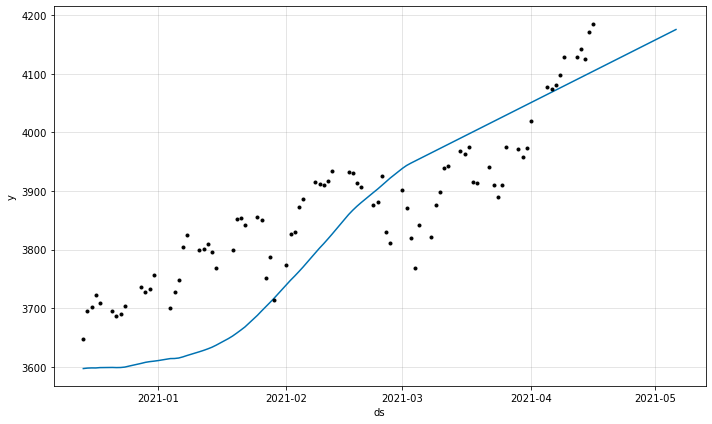

In [23]:
plot_forecast(model, sp500_data, periods=20)

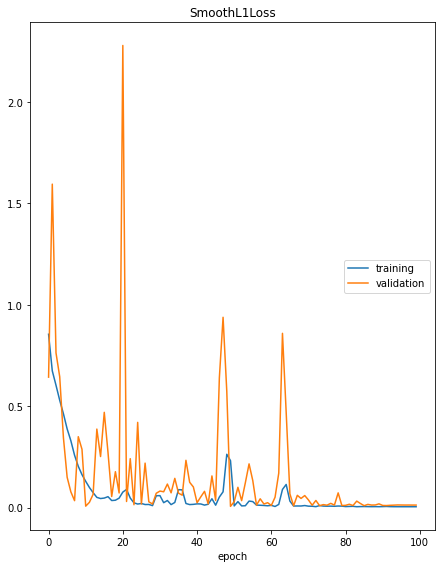

Epoch[100/100]: 100%|██████████| 100/100 [00:08<00:00, 11.38it/s, SmoothL1Loss=0.00438, MAE=26.7, RegLoss=0.0101, MAE_val=50.5, SmoothL1Loss_val=0.0125]


In [24]:
model = NeuralProphet(n_changepoints=100,
                      trend_reg=0.5,
                      yearly_seasonality=False,
                      weekly_seasonality=True,
                      daily_seasonality=False)
metrics = model.fit(sp500_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, 
                    epochs=100)

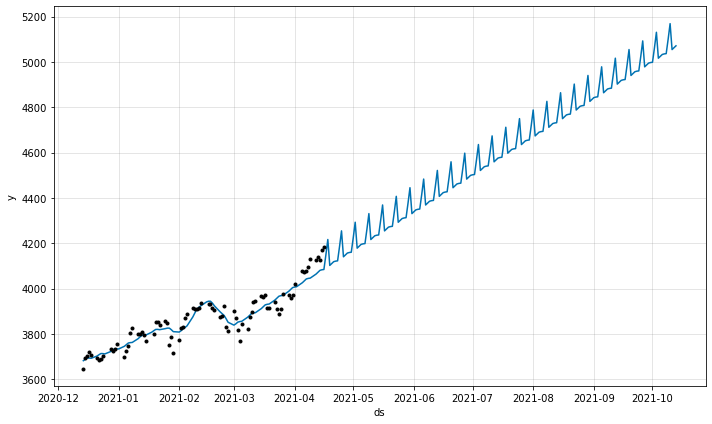

In [25]:
plot_forecast(model, sp500_data, periods=180)

In [26]:
model = NeuralProphet(
    n_forecasts=20,
    n_lags=20,
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    batch_size=64,
    epochs=100,
    learning_rate=1.0,
)
model.fit(sp500_data, 
          freq='D',
          valid_p=0.2,
          epochs=100)

INFO: nprophet - _handle_missing_data: 34 missing dates were added.
INFO: nprophet - _handle_missing_data: 39 NaN values in column y were auto-imputed.
Epoch[100/100]: 100%|██████████| 100/100 [00:00<00:00, 108.31it/s, SmoothL1Loss=0.00205, MAE=25.8, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.699079,582.321720,0.0
1,0.236668,309.516506,0.0
2,0.142670,232.587148,0.0
3,0.160945,243.393006,0.0
4,0.181129,261.071688,0.0
...,...,...,...
95,0.002062,25.784601,0.0
96,0.002055,25.767290,0.0
97,0.002051,25.760610,0.0
98,0.002049,25.766206,0.0


INFO: nprophet - _handle_missing_data: 34 missing dates were added.
INFO: nprophet - _handle_missing_data: 39 NaN values in column y were auto-imputed.


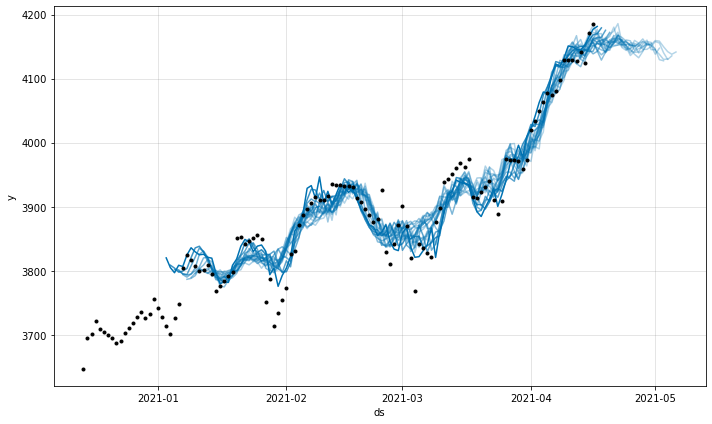

In [27]:
plot_forecast(model, sp500_data, periods=180)

In [36]:
#https://facebook.github.io/prophet/docs/diagnostics.html
data = pd.read_csv('example_air_passengers2.csv',delimiter=';', skiprows=0,low_memory=False)
print(data.tail(44))

            ds     y
56  11/04/2020    85
57  12/04/2020   168
58  13/04/2020   151
59  14/04/2020   215
60  15/04/2020   278
61  16/04/2020   183
62  17/04/2020   213
63  18/04/2020   152
64  19/04/2020   300
65  20/04/2020   284
66  21/04/2020   353
67  22/04/2020   242
68  23/04/2020   364
69  24/04/2020   295
70  25/04/2020   526
71  26/04/2020   485
72  27/04/2020   278
73  28/04/2020   641
74  29/04/2020   415
75  30/04/2020  1065
76  01/05/2020   598
77  02/05/2020   991
78  03/05/2020   751
79  04/05/2020   947
80  05/05/2020   885
81  06/05/2020   942
82  07/05/2020  1048
83  08/05/2020   841
84  09/05/2020  1073
85  10/05/2020   804
86  11/05/2020  1041
87  12/05/2020   955
88  13/05/2020   900
89  14/05/2020   838
90  15/05/2020   665
91  16/05/2020   608
92  17/05/2020   692
93  18/05/2020   845
94  19/05/2020  1072
95  20/05/2020  1008
96  21/05/2020   851
97  22/05/2020   719
98  23/05/2020   887
99  24/05/2020   710


In [37]:
prcp_data = data.rename(columns={'ds': 'ds', 'y': 'y'})[['ds', 'y']]

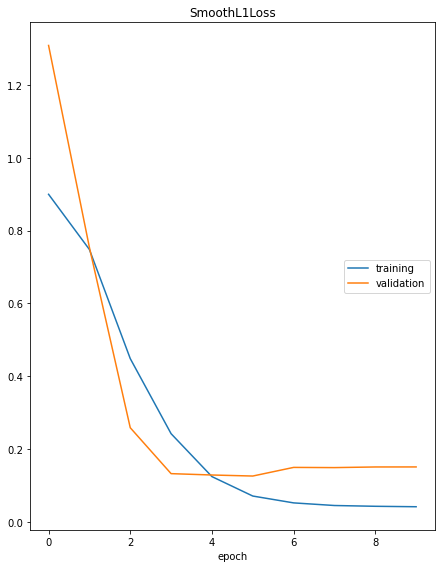

Epoch[10/10]: 100%|██████████| 10/10 [00:02<00:00,  4.86it/s, SmoothL1Loss=0.0414, MAE=253, RegLoss=0, MAE_val=520, SmoothL1Loss_val=0.151]


In [38]:
model = NeuralProphet()
metrics = model.fit(prcp_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, epochs=10)

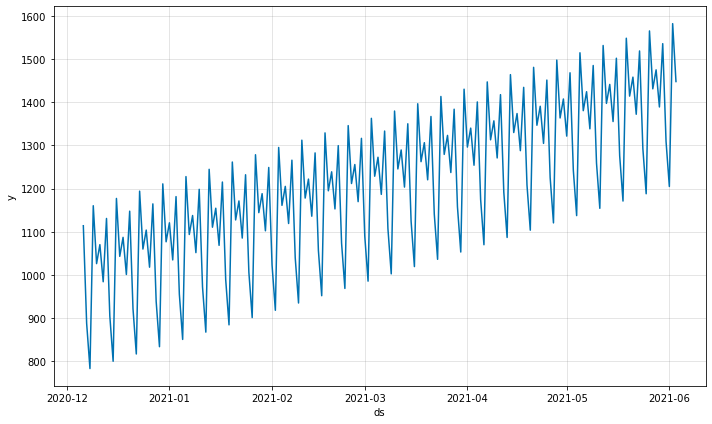

In [39]:
future = model.make_future_dataframe(prcp_data, periods=180)
forecast = model.predict(future)
forecasts_plot = model.plot(forecast)

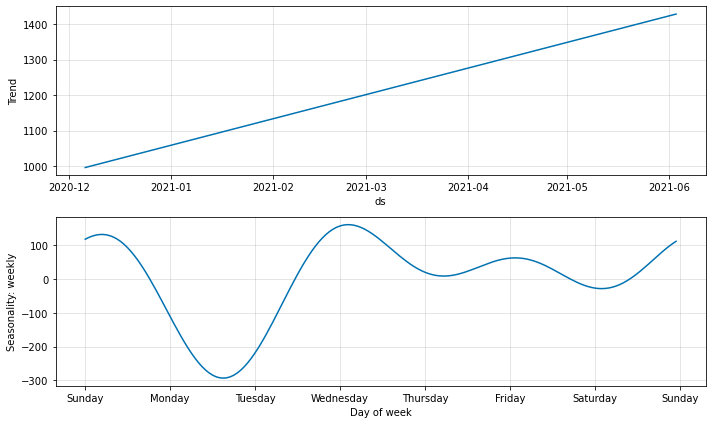

In [40]:
fig_comp = model.plot_components(forecast)

Text(0.5, 1.0, 'S&P 500 Prices')

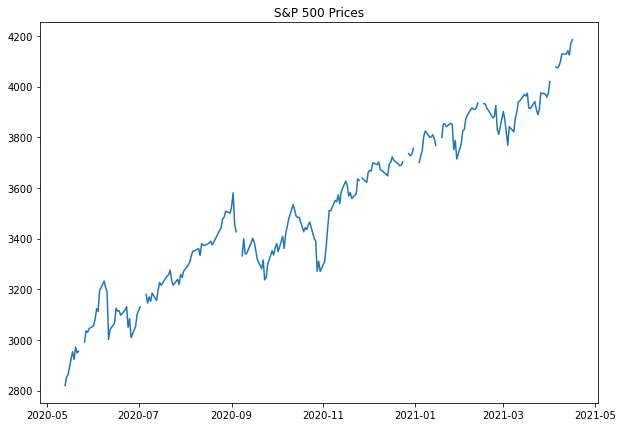

In [41]:
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
start = datetime(2020, 5, 13)
end = datetime(2021, 5, 11)
sp500_data = pdr.get_data_fred('sp500', start, end)
plt.figure(figsize=(10, 7))
plt.plot(sp500_data)
plt.title('S&P 500 Prices')

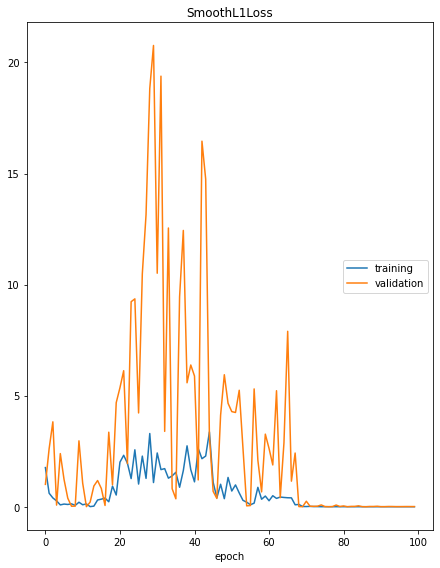

Epoch[100/100]: 100%|██████████| 100/100 [00:06<00:00, 15.95it/s, SmoothL1Loss=0.00137, MAE=47.8, RegLoss=0.000572, MAE_val=133, SmoothL1Loss_val=0.00852]


In [42]:
sp500_data = sp500_data.reset_index().rename(columns={'DATE': 'ds', 'sp500': 'y'}) # the usual preprocessing routine
model = NeuralProphet(n_changepoints=100,
                      trend_reg=0.05,
                      yearly_seasonality=False,
                      weekly_seasonality=False,
                      daily_seasonality=False)
metrics = model.fit(sp500_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, 
                    epochs=100)

In [43]:
def plot_forecast(model, data, periods, historic_pred=True, highlight_steps_ahead=None):
  
    """ plot_forecast function - generates and plots the forecasts for a NeuralProphet model
    - model -> a trained NeuralProphet model
    - data -> the dataframe used for training
    - periods -> the number of periods to forecast
    - historic_pred -> a flag indicating whether or not to plot the model's predictions on historic data
    - highlight_steps_ahead -> the number of steps ahead of the forecast line to highlight, used for autoregressive models only"""
    
    future = model.make_future_dataframe(data, 
                                         periods=periods, 
                                         n_historic_predictions=historic_pred)
    forecast = model.predict(future)
    
    if highlight_steps_ahead is not None:
        model = model.highlight_nth_step_ahead_of_each_forecast(highlight_steps_ahead)
        model.plot_last_forecast(forecast)
    else:    
        model.plot(forecast)

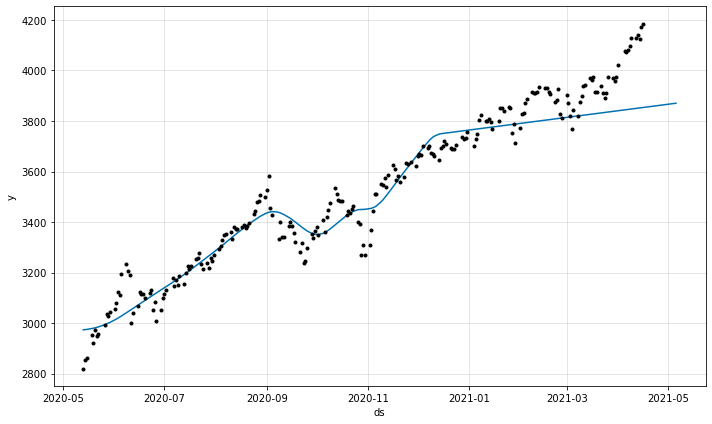

In [46]:
plot_forecast(model, sp500_data, periods=20)

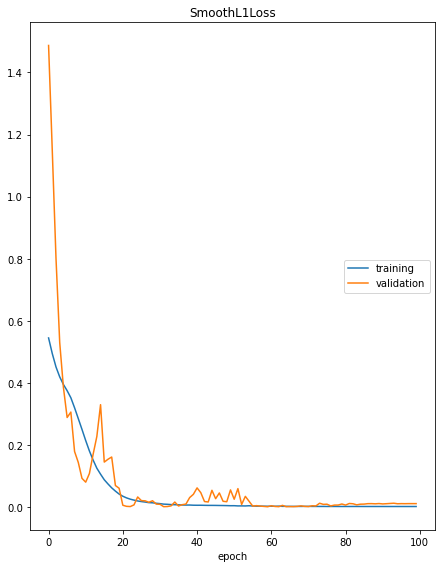

Epoch[100/100]: 100%|██████████| 100/100 [00:07<00:00, 14.26it/s, SmoothL1Loss=0.00227, MAE=64.1, RegLoss=0.0068, MAE_val=157, SmoothL1Loss_val=0.0116]


In [47]:
model = NeuralProphet(n_changepoints=100,
                      trend_reg=0.5,
                      yearly_seasonality=False,
                      weekly_seasonality=True,
                      daily_seasonality=False)
metrics = model.fit(sp500_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, 
                    epochs=100)

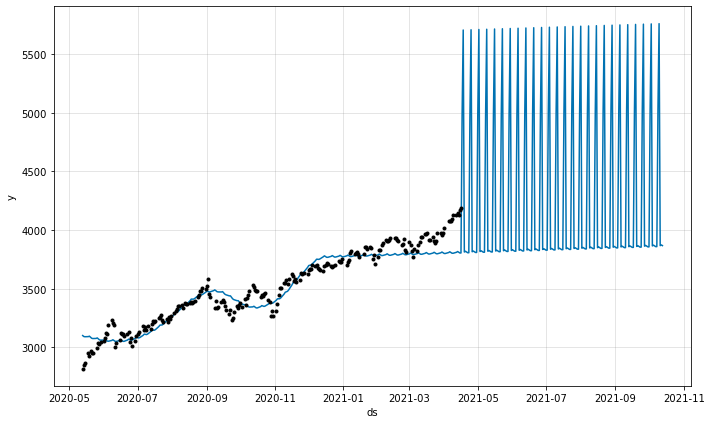

In [48]:
plot_forecast(model, sp500_data, periods=180)

In [49]:
model = NeuralProphet(
    n_forecasts=20,
    n_lags=20,
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    batch_size=64,
    epochs=100,
    learning_rate=1.0,
)
model.fit(sp500_data, 
          freq='D',
          valid_p=0.2,
          epochs=100)

INFO: nprophet - _handle_missing_data: 96 missing dates were added.
INFO: nprophet - _handle_missing_data: 105 NaN values in column y were auto-imputed.
Epoch[100/100]: 100%|██████████| 100/100 [00:02<00:00, 44.28it/s, SmoothL1Loss=0.000593, MAE=36.3, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.684823,1526.914009,0.0
1,0.336414,953.903394,0.0
2,0.151745,626.525910,0.0
3,0.148302,624.028363,0.0
4,0.169806,669.554418,0.0
...,...,...,...
95,0.000594,36.295749,0.0
96,0.000594,36.308131,0.0
97,0.000593,36.306617,0.0
98,0.000593,36.304940,0.0


INFO: nprophet - _handle_missing_data: 96 missing dates were added.
INFO: nprophet - _handle_missing_data: 105 NaN values in column y were auto-imputed.


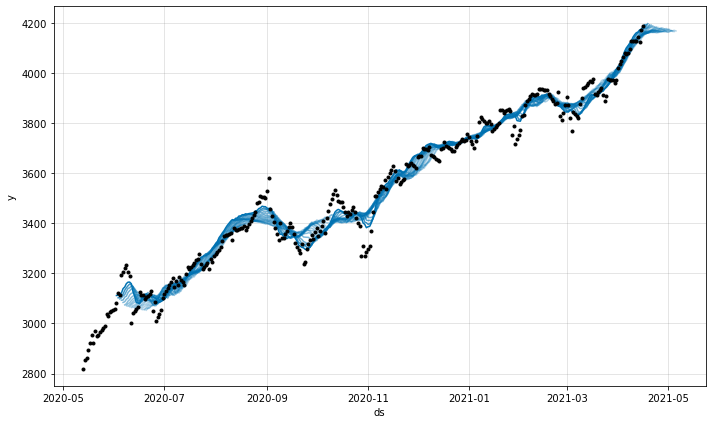

In [50]:
plot_forecast(model, sp500_data, periods=180)

In [28]:
data = pd.read_csv('example_retail_sales3.csv',delimiter=';', skiprows=0,low_memory=False)
print(data.tail(44))

           Date  First_wave_Deaths
45   30/05/2020                 11
46   31/05/2020                  7
47   01/06/2020                  8
48   02/06/2020                  6
49   03/06/2020                  4
50   04/06/2020                  6
51   05/06/2020                  8
52   06/06/2020                 10
53   07/06/2020                 10
54   08/06/2020                  5
55   09/06/2020                  4
56   10/06/2020                  2
57   11/06/2020                  4
58   12/06/2020                  6
59   13/06/2020                  4
60   14/06/2020                  7
61   15/06/2020                  2
62   16/06/2020                  5
63   17/06/2020                  3
64   18/06/2020                  2
65   19/06/2020                  5
66   20/06/2020                  6
67   21/06/2020                  7
68   22/06/2020                  4
69   23/06/2020                  4
70   24/06/2020                  3
71   25/06/2020                  2
72   26/06/2020     

In [29]:
prcp_data = data.rename(columns={'Date': 'ds', 'First_wave_Deaths': 'y'})[['ds', 'y']]

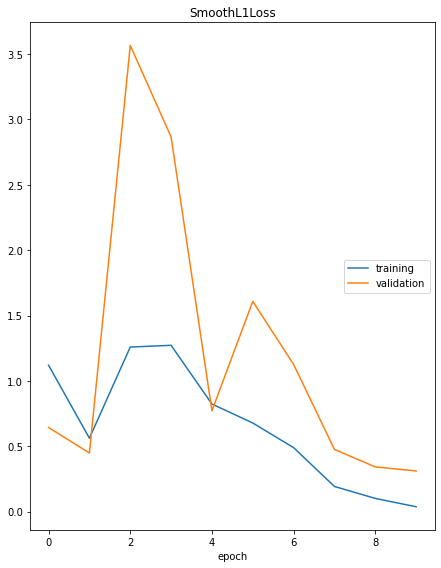

Epoch[10/10]: 100%|██████████| 10/10 [00:01<00:00,  5.39it/s, SmoothL1Loss=0.0374, MAE=2.3, RegLoss=0, MAE_val=6.81, SmoothL1Loss_val=0.311]


In [30]:
model = NeuralProphet()
metrics = model.fit(prcp_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, epochs=10)

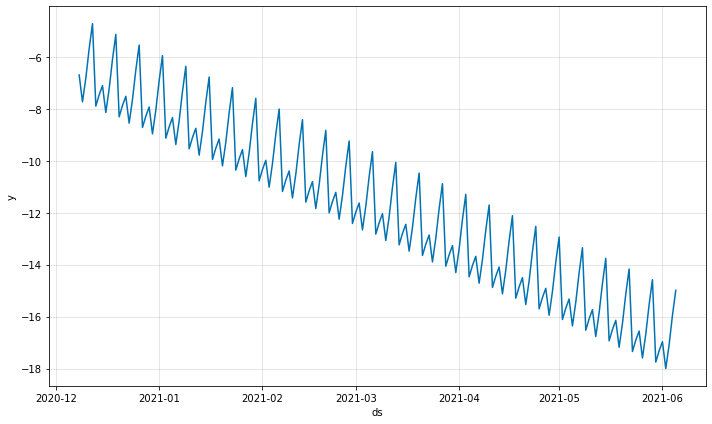

In [31]:
future = model.make_future_dataframe(prcp_data, periods=180)
forecast = model.predict(future)
forecasts_plot = model.plot(forecast)

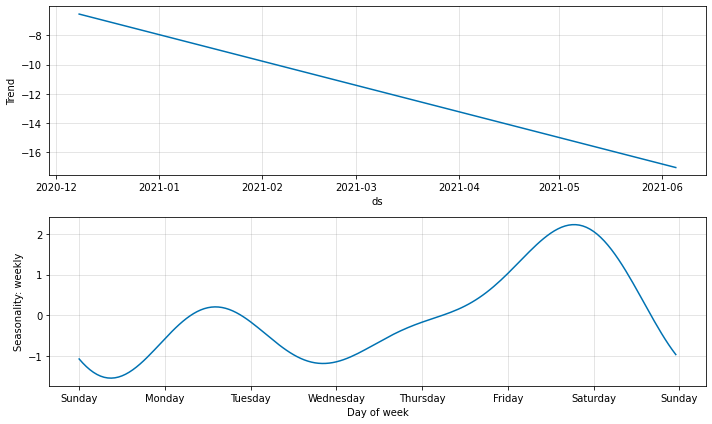

In [32]:
fig_comp = model.plot_components(forecast)

Text(0.5, 1.0, 'S&P 500 Prices')

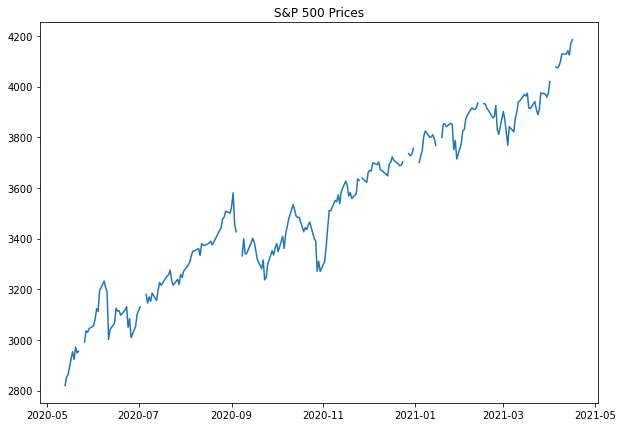

In [33]:
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
start = datetime(2020, 5, 13)
end = datetime(2021, 5, 11)
sp500_data = pdr.get_data_fred('sp500', start, end)
plt.figure(figsize=(10, 7))
plt.plot(sp500_data)
plt.title('S&P 500 Prices')

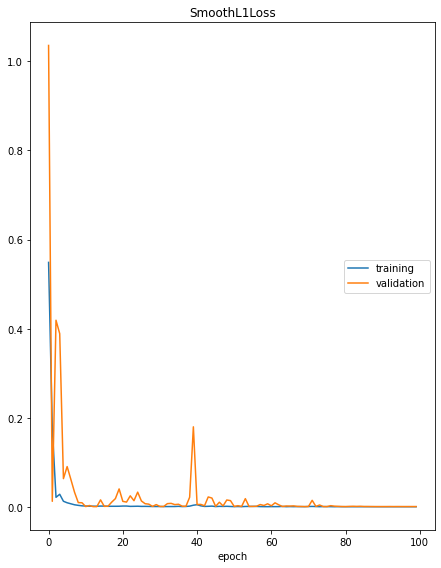

Epoch[100/100]: 100%|██████████| 100/100 [00:06<00:00, 16.60it/s, SmoothL1Loss=0.00117, MAE=42.2, RegLoss=0.000857, MAE_val=56.5, SmoothL1Loss_val=0.00156]


In [34]:
sp500_data = sp500_data.reset_index().rename(columns={'DATE': 'ds', 'sp500': 'y'}) # the usual preprocessing routine
model = NeuralProphet(n_changepoints=100,
                      trend_reg=0.05,
                      yearly_seasonality=False,
                      weekly_seasonality=False,
                      daily_seasonality=False)
metrics = model.fit(sp500_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, 
                    epochs=100)

In [35]:
def plot_forecast(model, data, periods, historic_pred=True, highlight_steps_ahead=None):
  
    """ plot_forecast function - generates and plots the forecasts for a NeuralProphet model
    - model -> a trained NeuralProphet model
    - data -> the dataframe used for training
    - periods -> the number of periods to forecast
    - historic_pred -> a flag indicating whether or not to plot the model's predictions on historic data
    - highlight_steps_ahead -> the number of steps ahead of the forecast line to highlight, used for autoregressive models only"""
    
    future = model.make_future_dataframe(data, 
                                         periods=periods, 
                                         n_historic_predictions=historic_pred)
    forecast = model.predict(future)
    
    if highlight_steps_ahead is not None:
        model = model.highlight_nth_step_ahead_of_each_forecast(highlight_steps_ahead)
        model.plot_last_forecast(forecast)
    else:    
        model.plot(forecast)

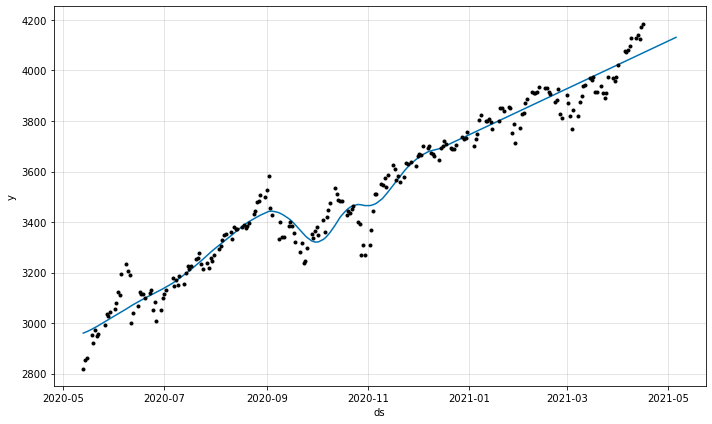

In [36]:
plot_forecast(model, sp500_data, periods=20)

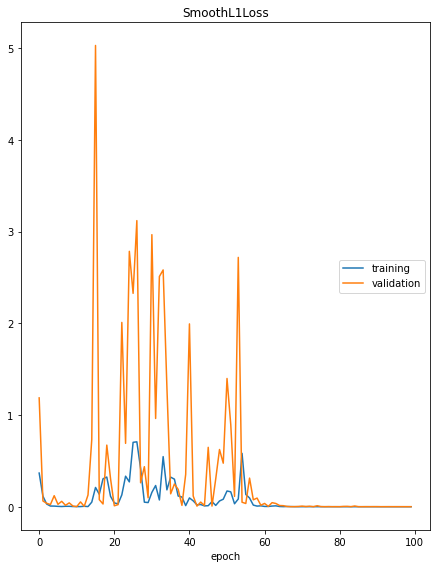

Epoch[100/100]: 100%|██████████| 100/100 [00:06<00:00, 14.99it/s, SmoothL1Loss=0.00123, MAE=45.2, RegLoss=0.0038, MAE_val=60.4, SmoothL1Loss_val=0.00193]


In [37]:
model = NeuralProphet(n_changepoints=100,
                      trend_reg=0.5,
                      yearly_seasonality=False,
                      weekly_seasonality=True,
                      daily_seasonality=False)
metrics = model.fit(sp500_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, 
                    epochs=100)

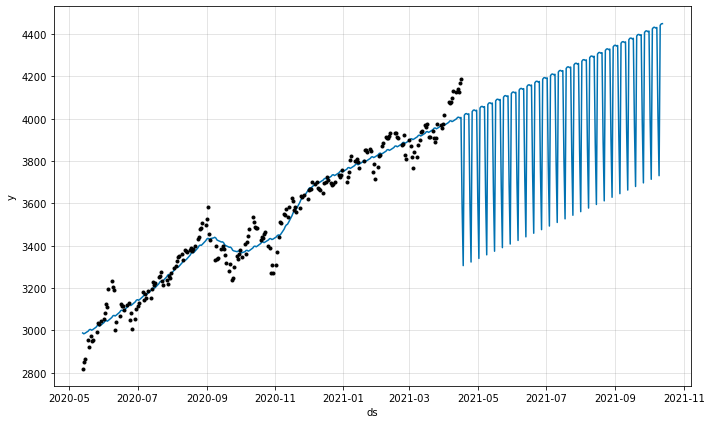

In [38]:
plot_forecast(model, sp500_data, periods=180)

In [39]:
model = NeuralProphet(
    n_forecasts=20,
    n_lags=20,
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    batch_size=64,
    epochs=100,
    learning_rate=1.0,
)
model.fit(sp500_data, 
          freq='D',
          valid_p=0.2,
          epochs=100)

INFO: nprophet - _handle_missing_data: 96 missing dates were added.
INFO: nprophet - _handle_missing_data: 105 NaN values in column y were auto-imputed.
Epoch[100/100]: 100%|██████████| 100/100 [00:02<00:00, 45.87it/s, SmoothL1Loss=0.000564, MAE=35.5, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.576787,1331.891536,0.0
1,0.309215,928.439469,0.0
2,0.148647,613.371052,0.0
3,0.122523,552.730278,0.0
4,0.124220,559.741520,0.0
...,...,...,...
95,0.000565,35.529670,0.0
96,0.000565,35.507523,0.0
97,0.000565,35.497313,0.0
98,0.000564,35.484451,0.0


INFO: nprophet - _handle_missing_data: 96 missing dates were added.
INFO: nprophet - _handle_missing_data: 105 NaN values in column y were auto-imputed.


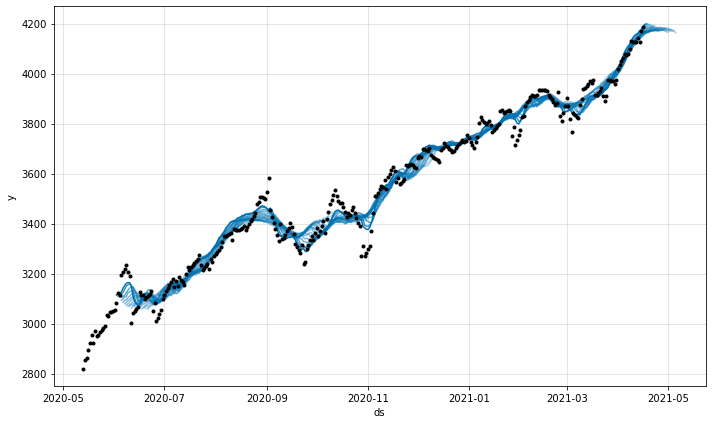

In [40]:
plot_forecast(model, sp500_data, periods=180)

In [ ]:
#https://towardsdatascience.com/how-to-use-facebooks-neuralprophet-and-why-it-s-so-powerful-136652d2da8b
#https://github.com/AmolMavuduru/NeuralProphetExamples/blob/master/.ipynb_checkpoints/NeuralProphet%20Examples-checkpoint.ipynb
#https://amulyaagrawal18.medium.com/weather-forecasting-implementation-and-analysis-of-different-machine-learning-models-61a6126eebb
#https://medium.com/swlh/time-series-analysis-7006ea1c3326
#https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/